            Word  Count  Compound
65      hospital    115  0.136184
39           not     62 -0.268515
48          good     47  0.710111
59          time     33  0.143015
198      waiting     31 -0.577358
254         care     30  0.672867
247       doctor     30 -0.096630
51          help     29  0.086603
133         well     28  0.530936
168         also     26  0.157831
72         times     25 -0.024304
16          wait     25 -0.422828
167  appointment     24  0.011692
163     friendly     24  0.639988
161   department     23  0.136548
             Word  Count  Compound
798           two      7 -0.869114
475         sleep      5 -0.815660
443         going      6 -0.760133
466          pain      8 -0.748938
223       allowed      5 -0.665120
1091  neurologist      6 -0.648950
188           bad     18 -0.613817
66           year      5 -0.584800
198       waiting     31 -0.577358
282         weeks     13 -0.575300
646          half      7 -0.570386
628    especially      5 -0.529600
7

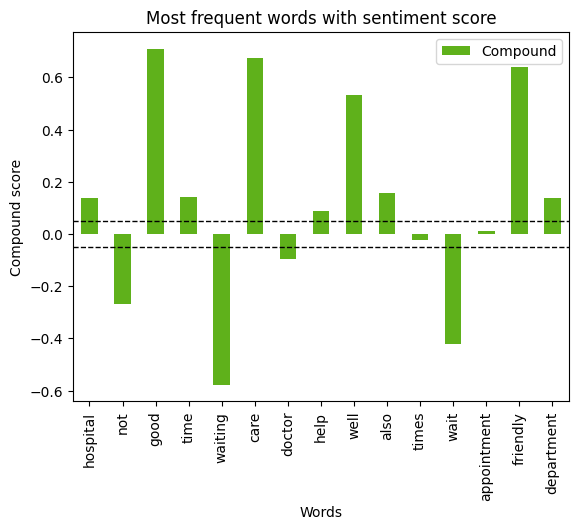

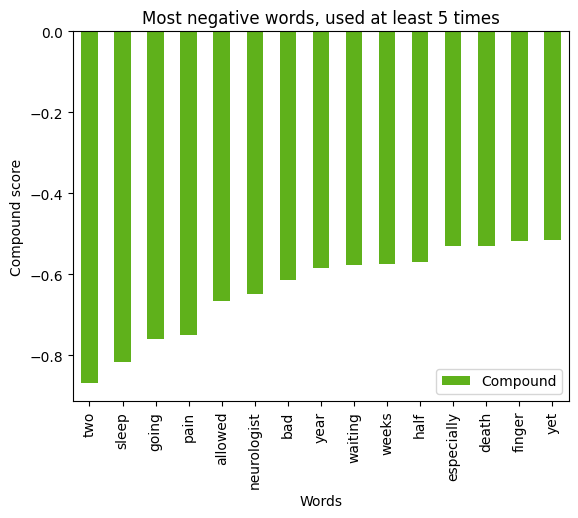

In [1]:
import pandas as pd
from deep_translator import (GoogleTranslator,
                             PonsTranslator,
                             LingueeTranslator,
                             MyMemoryTranslator,
                             YandexTranslator,
                             single_detection,
                             batch_detection)
import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
import CleanupFunctions as clean
import AddedWords
import WordsSentiment

# Haalt info uit csv op.
dfDutch = pd.read_csv("CSVFiles/GoogleReviewsZGVNoEmpty.csv")

dfSentiment = pd.DataFrame.from_dict({
    "id":[],
    "text": [],
    "compound": [],
    "neg":[],
    "neu":[],
    "pos":[],
})

sia = SentimentIntensityAnalyzer()
# Update de woordenlijst, met zelftoegevoegde woorden en het sentiment, bron: https://ithaka.github.io/tdm-notebooks/sentiment-analysis-with-vader.html
sia.lexicon.update(AddedWords.added_words())

#Loop die er voor zorgt dat alle vertaalde reviews wordt uitgeprint
for col_name, review in dfDutch.iterrows():
    translated = GoogleTranslator(source='dutch', target='english').translate(text=dfDutch.loc[col_name]['review_text'])
    textlowercase = clean.convert_to_lowercase(translated)
    textclean = clean.punc_clean(textlowercase)
    textstopword = clean.remove_stopword(textclean)
    tokenized = sent_tokenize(textstopword)
    for line in tokenized:     
        ss = sia.polarity_scores(line)
        compound = ss["compound"]
        dfTemp = pd.DataFrame.from_dict({
                            "id":[col_name],
                            "text": [textstopword],
                            "compound": [compound],
                            "neg":[ss["neg"]],
                            "neu":[ss["neu"]],
                            "pos":[ss["pos"]],
                            })

        WordsSentiment.words_sentiment(compound, line)

    dfSentiment = pd.concat([dfSentiment, dfTemp], ignore_index=True)
    
WordsSentiment.print_graphs()



